# 1. Read, Display and Write an Image

cv2.imread(): read an image.  parameters: cv2.IMREAD_COLOR, cv2.IMREAD_GRAYSCALE, cv2.IMREAD_UNCHANGED.  

cv2.imshow(): show an image. 

cv2.imwrite(): save an image. 

In [24]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
############## Read an Image ########################################################################################
## Load an image in grayscale and color mode and save to img1 and img2 separately.
## Note: even if the image path is wrong, it won’t throw any error.
img_gray = cv2.imread('../picture/messi5.jpg', cv2.IMREAD_GRAYSCALE)
img_color = cv2.imread('../picture/messi5.jpg', cv2.IMREAD_COLOR)
img_gray.shape, img_color.shape     # shows the dimension of the two variables. 

((342, 548), (342, 548, 3))

In [7]:
############## Display and write an Image ############################################################################
## Save the image if you press ‘s’ and exit, or simply exit without saving if you press ESC key.
cv2.imshow('grayscale_image', img_gray)
cv2.imshow('color_image', img_color)
k = cv2.waitKey(0) 
if k == 27:         # wait for ESC key to exit
    cv2.destroyAllWindows()
elif k == ord('s'): # wait for 's' key to save and exit
    cv2.imwrite('../picture/messigray.png',img_gray)
    cv2.destroyAllWindows()

In [16]:
############## Display image with Matplotlib ########################################################################
## Warning: Color image loaded by OpenCV is in BGR mode. But Matplotlib displays in RGB mode. 
plt.imshow(img_color) 
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()  

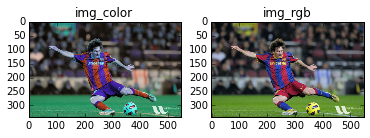

In [10]:
## Using Matplotlib to plot true color

b,g,r = cv2.split(img_color)
img_rgb = cv2.merge([r, g, b])
plt.subplot(121), plt.imshow(img_color), plt.title('img_color') # expects distorted color
plt.subplot(122), plt.imshow(img_rgb), plt.title('img_rgb')# expect true color
plt.show()

In [9]:
## Using OpenCV to plot true color
cv2.imshow('bgr image', img_color) # expects true color
cv2.imshow('rgb image', img_rgb) # expects distorted color
cv2.waitKey(0)
cv2.destroyAllWindows()

NameError: name 'img_rgb' is not defined

In [18]:
cv2.destroyAllWindows()




# 2. Geometric Transformation

cv2.resize(): scaling/resizing an image. Parameters: cv2.INTER_AREA, cv2.INTER_CUBIC & cv2.INTER_LINEAR

cv2.warpAffine(): translation, rotation and affine translation of an image.


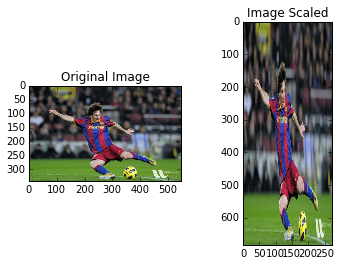

In [11]:
############## Scaling ##############################################################################################
## The size of the image can be specified manually, or you can specify the scaling factor. 
## Different interpolation methods: cv2.INTER_AREA for shrinking, cv2.INTER_CUBIC (slow) & cv2.INTER_LINEAR (default) for zooming. 
img_scl = cv2.resize(img_rgb, None, fx=0.5, fy=2, interpolation = cv2.INTER_CUBIC)
plt.subplot(121), plt.imshow(img_rgb,cmap = 'gray'), plt.title('Original Image')
plt.subplot(122), plt.imshow(img_scl,cmap = 'gray'), plt.title( 'Image Scaled')
plt.show()

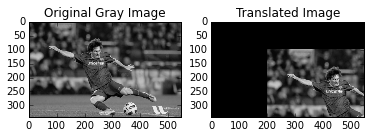

In [20]:
############## Translation ###########################################################################################
## Translation is the shifting of object’s location. 
## If you know the shift in (x=200,y=100) direction, create the transformation matrix as follows:
rows, cols = img_gray.shape
M = np.float32([[1,0,200], [0,1,100]])
img_trans = cv2.warpAffine(img_gray, M, (cols,rows))
plt.subplot(121), plt.imshow(img_gray,cmap = 'gray'), plt.title('Original Gray Image')
plt.subplot(122), plt.imshow(img_trans,cmap = 'gray'), plt.title('Translated Image')
plt.show()

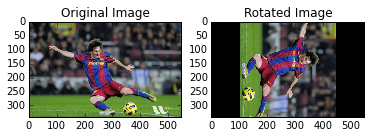

In [21]:
############## Rotation ############################################################################################
## Rotation of an image for an angle (positive angle: counter clockwise, negative angle: clockwise
M = cv2.getRotationMatrix2D((cols/2,rows/2), -90, 1)   # (cols/2, rows/2) is the center of the rotation
img_rot = cv2.warpAffine(img_rgb, M, (cols,rows))
plt.subplot(121), plt.imshow(img_rgb), plt.title('Original Image')
plt.subplot(122), plt.imshow(img_rot), plt.title('Rotated Image')
plt.show()

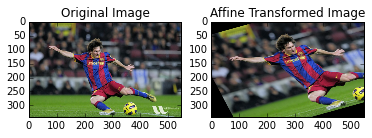

In [12]:
############## Affine transformation ################################################################################
##In affine transformation, all parallel lines in the original image will still be parallel in the output image. 
## To find the transformation matrix, we need three points from input image and their corresponding locations in output image. Then cv2.getAffineTransform will create a 2x3 matrix which is to be passed to cv2.warpAffine.
rows, cols, ch = img_color.shape
pts1 = np.float32([[50,50], [200,50], [50,200]])
pts2 = np.float32([[20,100], [200,50], [100,250]])
M = cv2.getAffineTransform(pts1, pts2)
img_aff = cv2.warpAffine(img_rgb, M, (cols,rows))
plt.subplot(121), plt.imshow(img_rgb), plt.title('Original Image')
plt.subplot(122), plt.imshow(img_aff), plt.title('Affine Transformed Image')
plt.show()

# 3. Morphological Transformation

cv2.erode(): Image erosion.

cv2.dilate(): Image dilation.

cv2.morphologyEx(): morphological operation of an image, including open and close. 


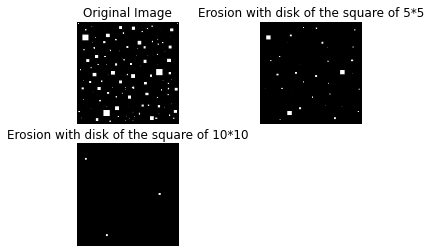

In [13]:
############## Erosion #############################################################################################
## The basic idea of erosion is to erode away the boundaries of foreground object (Always try to keep foreground 
## in white). 2D convolution. A pixel in the original image (either 1 or 0) will be considered 1 only if all the 
## pixels under the kernel is 1, otherwise it is eroded (made to zero).
img_square = cv2.imread('../picture/squares.png', 0)
kernel_1 = np.ones((5,5), np.uint8)         # kernel_1 with the square of 5*5
kernel_2 = np.ones((10,10), np.uint8)       # kernel_1 with the square of 10*10
erosion_1 = cv2.erode(img_square, kernel_1, iterations = 1)
erosion_2 = cv2.erode(img_square, kernel_2, iterations = 1)
plt.subplot(221), plt.imshow(img_square, cmap = 'gray'), plt.title('Original Image')
plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.imshow(erosion_1, cmap = 'gray'), plt.title('Erosion with disk of the square of 5*5')
plt.xticks([]), plt.yticks([])
plt.subplot(223), plt.imshow(erosion_2, cmap = 'gray'), plt.title('Erosion with disk of the square of 10*10')
plt.xticks([]), plt.yticks([])
plt.show()
cv2.imshow("Original Image", img_square)
cv2.imshow("Erosion with disk of the square of 5*5", erosion_1)
cv2.waitKey(0)
cv2.destroyAllWindows()

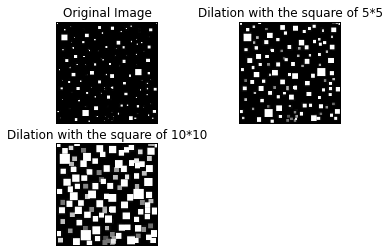

In [25]:
############## Dilation ############################################################################################
## It is opposite of erosion. A pixel element is ‘1’ if at least one pixel under the kernel is ‘1’. 
## So it increases the white region in the image or size of foreground object increases. 
## Normally, in cases like noise removal, erosion is followed by dilation. 
## Because, erosion removes white noises, but it also shrinks our object. So we dilate it. 
dilation_1 = cv2.dilate(img_square, kernel_1, iterations = 1)
dilation_2 = cv2.dilate(img_square, kernel_2, iterations = 1)
plt.subplot(221), plt.imshow(img_square,cmap = 'gray'), plt.title('Original Image')
plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.imshow(dilation_1,cmap = 'gray'), plt.title('Dilation with the square of 5*5')
plt.xticks([]), plt.yticks([])
plt.subplot(223), plt.imshow(dilation_2,cmap = 'gray'), plt.title('Dilation with the square of 10*10')
plt.xticks([]), plt.yticks([])
plt.show()

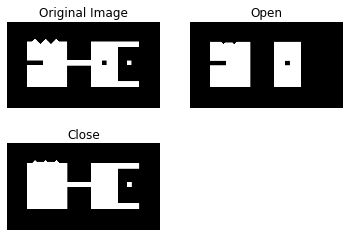

In [29]:
############## Open vs. Close ######################################################################################
## Opening: Erosion fist, Dilation second. It is useful in removing noise. Here we use the function, cv2.morphologyEx()
## Closing: Dilation first, Erosion second. It is useful in closing small holes inside the foreground objects.
img_shapes = cv2.imread('../picture/shapes.png',0)
kernel_1 = np.ones((50,50), np.uint8)         # kernel_1 with the square of 50*50
opening = cv2.morphologyEx(img_shapes, cv2.MORPH_OPEN, kernel_1)
closing = cv2.morphologyEx(img_shapes, cv2.MORPH_CLOSE, kernel_1)
plt.subplot(221),plt.imshow(img_shapes,cmap = 'gray'),plt.title('Original Image')
plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(opening,cmap = 'gray'),plt.title('Open')
plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(closing,cmap = 'gray'),plt.title('Close')
plt.xticks([]), plt.yticks([])
plt.show()

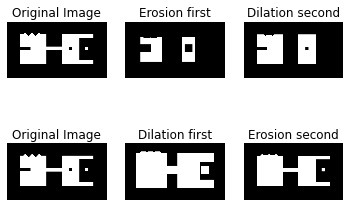

In [30]:
erosion_1 = cv2.erode(img_shapes, kernel_1, iterations = 1)
dilation_1 = cv2.dilate(erosion_1, kernel_1, iterations = 1)
dilation_2 = cv2.dilate(img_shapes, kernel_1, iterations = 1)
erosion_2 = cv2.erode(dilation_2, kernel_1, iterations = 1)
plt.subplot(231),plt.imshow(img_shapes,cmap = 'gray'),plt.title('Original Image')
plt.xticks([]), plt.yticks([])
plt.subplot(232),plt.imshow(erosion_1,cmap = 'gray'),plt.title('Erosion first')
plt.xticks([]), plt.yticks([])
plt.subplot(233),plt.imshow(dilation_1,cmap = 'gray'),plt.title('Dilation second')
plt.xticks([]), plt.yticks([])
plt.subplot(234),plt.imshow(img_shapes,cmap = 'gray'),plt.title('Original Image')
plt.xticks([]), plt.yticks([])
plt.subplot(235),plt.imshow(dilation_2,cmap = 'gray'),plt.title('Dilation first')
plt.xticks([]), plt.yticks([])
plt.subplot(236),plt.imshow(erosion_2,cmap = 'gray'),plt.title('Erosion second')
plt.xticks([]), plt.yticks([])
plt.show()

# 4. Histogram and Histogram Equalization

cv2.calcHist(): calculate histogram.

plt.hist(): histogram plot in Matplotlib.

cv2.equalizeHist(): histogram equalization.

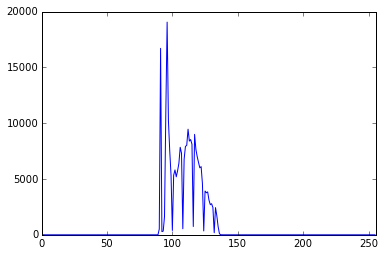

In [25]:
############## Histogram Calculation in OpenCV ######################################################################
## use cv2.calcHist() function to find the histogram. 
## cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])
## images : it is the source image of type uint8 or float32. it should be given in square brackets, ie, “[img]”.
## channels : it is also given in square brackets. It the index of channel for which we calculate histogram. 
## For example, if input is grayscale image, its value is [0]. For color image, you can pass [0],[1] or [2] to 
## calculate histogram of blue,green or red channel respectively.
## mask : mask image. To find histogram of full image, it is given as “None”. 
## histSize : this represents our BIN count. Need to be given in square brackets. For full scale, we pass [256].
## ranges : this is our RANGE. Normally, it is [0,256].
img_seeds = cv2.imread('../picture/seeds.jpg',0)
cv2.imshow("Original Image", img_seeds)
cv2.waitKey(0)
cv2.destroyAllWindows()
hist = cv2.calcHist([img_seeds], [0], None, [256], [0,256])
plt.plot(hist)
plt.xlim([0,256])
plt.show()


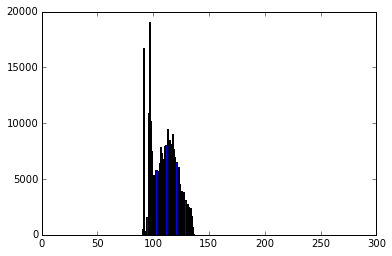

In [26]:
############## Histogram Plot in Matplotlib ######################################################################
## Matplotlib comes with a histogram plotting function : matplotlib.pyplot.hist()
## It directly finds the histogram and plot it. 
plt.hist(img_seeds.ravel(),256,[0,256])
plt.show()

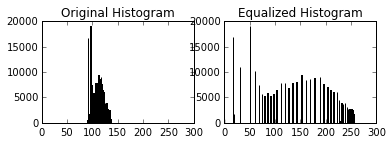

In [27]:
############## Histogram Equalization ######################################################################
img_equ = cv2.equalizeHist(img_seeds)
plt.subplot(221), plt.hist(img_seeds.ravel(),256,[0,256]), plt.title('Original Histogram')
plt.subplot(222), plt.hist(img_equ.ravel(),256,[0,256]), plt.title('Equalized Histogram')
plt.show()
cv2.imshow("Original Image", img_seeds)
cv2.imshow("Histogram Equalized Image", img_equ)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 5. Canny Edge Detection

cv2.canny(): detect edge in an image using Canny Edge Detection methods developed by John F. Canny in 1986.

In [ ]:
############## Canny Edge Detection ######################################################################
## First argument is our input image. Second and third arguments are our minVal and maxVal respectively. 
## Fourth argument is aperture_size. It is the size of Sobel kernel used for find image gradients.By default it is 3.
img = cv2.imread('../picture/building.jpg',0)
edges = cv2.Canny(img, 100, 200)
cv2.imshow("Original Image", img)
cv2.imshow("Histogram Equalized Image", edges)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 6. Hough Transform Line Detection

cv2.HoughLines(): detect lines using Hough Transform

In [ ]:
############## Hough Transform Line Detection ######################################################################
## First parameter, Input image should be a binary image, so apply threshold or use canny edge detection before 
## finding applying hough transform. Second and third parameters are \rho and \theta accuracies respectively. 
## Fourth argument is the threshold, which means minimum vote it should get for it to be considered as a line. 
img = cv2.imread('../picture/building.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)
lines = cv2.HoughLines(edges,1,np.pi/180,200)
print lines
for rho,theta in lines[20]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)
    
cv2.imshow("houghlines", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

[[[ 355.            1.16937053]]

 [[ 454.            1.37881005]]

 [[ 403.            1.27409029]]

 [[ 305.            1.08210409]]

 [[ 524.            1.58824956]]

 [[ 261.            0.99483764]]

 [[ 460.            1.36135685]]

 [[ 262.            0.        ]]

 [[ 349.            1.16937053]]

 [[ 358.            1.15191734]]

 [[ 448.            1.37881005]]

 [[ 486.            1.48352981]]

 [[ 527.            1.60570288]]

 [[ 441.            1.39626336]]

 [[ 451.            1.37881005]]

 [[ 457.            1.37881005]]

 [[ 436.            1.57079637]]

 [[ 466.            1.41371667]]

 [[ 530.            1.57079637]]

 [[ 444.            1.39626336]]

 [[ 548.            1.57079637]]

 [[ 528.            1.48352981]]

 [[ 514.            1.60570288]]

 [[ 479.            1.43116999]]

 [[ 219.            0.92502451]]

 [[ 360.            1.15191734]]

 [[ 492.            1.46607661]]

 [[ 479.            1.53588974]]

 [[ 411.            1.27409029]]

 [[ 543.      